In [154]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

In [155]:
def read_image(filename):
    X = imageio.imread(filename)
    return np.array(X)

X = read_image('x2.bmp')
Y = read_image('y5.bmp')

print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (256, 188)
Y shape: (181, 188)


In [156]:
def isPsevdoInversed(A, A_psevdo_inverse) -> bool:
    if not np.allclose(A @ A_psevdo_inverse @ A, A):
        print('A * A+ * A != A')
        return False

    elif not np.allclose(A_psevdo_inverse @ A @ A_psevdo_inverse, A_psevdo_inverse):
        print('A+ * A * A+ != A+')
        return False

    elif not np.allclose(A @ A_psevdo_inverse, (A @ A_psevdo_inverse).T):
        print('A * A+ - not symmetric matrix m x m')
        return False

    elif not np.allclose(A_psevdo_inverse @ A, (A_psevdo_inverse @ A).T):
        print('A+ * A - not symmetric matrix n x n')
        return False
    
    return True

In [157]:
def PseudoInverseMatrix_MoorePenrose(A, eps=1e-6, delta=10):
    print('delta:', delta)

    A0 = A.T @ np.linalg.inv(A @ A.T + delta**2 * np.identity(A.shape[0]))
    print('A0:', A0)

    delta = delta / 2
    print('delta:', delta)

    iterations = 0
    while True:
        A1 = A.T @ np.linalg.inv(A @ A.T + delta**2 * np.identity(A.shape[0]))
        print('A1:', A1)
        if np.linalg.norm(A0 - A1, ord=2) < eps:
            print('iterations:', iterations)
            return A1

        delta = delta / 2
        print('delta:', delta)

        A0 = A1
        iterations += 1

#Test
Atest = np.array([[1, 2, 3, 4], [2, 4, 5, 8], [5, 6, 7, 8]])
Atest_pinv = PseudoInverseMatrix_MoorePenrose(Atest, delta=100)
print('Atest:', Atest)
print('Atest_pinv:', Atest_pinv)
assert isPsevdoInversed(Atest, Atest_pinv)

delta: 100
A0: [[9.52082571e-05 1.90882327e-04 4.88298415e-04]
 [1.93131681e-04 3.86923110e-04 5.83351682e-04]
 [2.91608387e-04 4.84022054e-04 6.79694563e-04]
 [3.88978530e-04 7.79004677e-04 7.73458215e-04]]
delta: 50.0
A1: [[0.00032967 0.00066618 0.00182809]
 [0.00069915 0.001408   0.0021555 ]
 [0.00107678 0.00176538 0.00250181]
 [0.00143812 0.00289163 0.0028103 ]]
delta: 25.0
A1: [[0.00075477 0.00159228 0.00592665]
 [0.00198637 0.00408953 0.00665463]
 [0.00331659 0.00517572 0.00760885]
 [0.00444957 0.00908401 0.00811058]]
delta: 12.5
A1: [[-3.45979288e-04 -1.72832184e-05  1.52203398e-02]
 [ 3.06111526e-03  7.06447016e-03  1.46741784e-02]
 [ 7.28074524e-03  9.31169955e-03  1.59027761e-02]
 [ 9.87530434e-03  2.12279769e-02  1.35818555e-02]]
delta: 6.25
A1: [[-0.00953735 -0.01528701  0.03614332]
 [-0.00053838  0.00402495  0.02582513]
 [ 0.01317989  0.00699641  0.02415669]
 [ 0.01745956  0.04264889  0.00518875]]
delta: 3.125
A1: [[-0.03965744 -0.06075428  0.08628567]
 [-0.01670821 -0.010

In [158]:
def PseudoInverseMatrix_Greville(A, eps=1e-6, delta=None):

    inverse_matrix = np.vstack(A[0] / np.dot(A[0].T, A[0]) if np.dot(A[0].T, A[0]) != 0 else A[0])
    current_matrix = np.array([A[0]])
    n = A.shape[0]
    for i in range(1, n):
        a = A[i].reshape(-1, 1)
        z = np.identity(current_matrix.shape[1]) - np.dot(inverse_matrix, current_matrix)
        current_matrix = np.vstack([current_matrix, A[i]])

        denum = np.dot(a.T, np.dot(z, a))[0, 0]
        if np.abs(denum) < eps:
            r = np.dot(inverse_matrix, inverse_matrix.T)
            denum = 1 + np.dot(a.T, np.dot(r, a))
            inverse_matrix = np.hstack((inverse_matrix - np.dot(z, np.dot(a, np.dot(a.T, inverse_matrix))) / denum, np.dot(r, a) / denum))
        else:
            inverse_matrix = np.hstack((inverse_matrix - np.dot(z, np.dot(a, np.dot(a.T, inverse_matrix))) / denum, np.dot(z, a) / denum))

        print('--------------------------------------------------------------------------')
        print('inverse_matrix:', inverse_matrix)

    return inverse_matrix

# Test
Atest = np.array([[1, 2, 3, 4], [5, 4, 5, 6], [5, 6, 7, 8]])
Atest_pinv = PseudoInverseMatrix_Greville(Atest)
print('Atest:', Atest)
print('Atest_pinv:', Atest_pinv)
assert isPsevdoInversed(Atest, Atest_pinv)

--------------------------------------------------------------------------
inverse_matrix: [[-0.44382022  0.2752809 ]
 [-0.01123596  0.04494382]
 [ 0.12921348 -0.01685393]
 [ 0.26966292 -0.07865169]]
--------------------------------------------------------------------------
inverse_matrix: [[-2.50000000e-01  5.00000000e-01 -2.50000000e-01]
 [-6.25000000e-01 -6.66666667e-01  7.91666667e-01]
 [-6.10622664e-15 -1.66666667e-01  1.66666667e-01]
 [ 6.25000000e-01  3.33333333e-01 -4.58333333e-01]]
Atest: [[1 2 3 4]
 [5 4 5 6]
 [5 6 7 8]]
Atest_pinv: [[-2.50000000e-01  5.00000000e-01 -2.50000000e-01]
 [-6.25000000e-01 -6.66666667e-01  7.91666667e-01]
 [-6.10622664e-15 -1.66666667e-01  1.66666667e-01]
 [ 6.25000000e-01  3.33333333e-01 -4.58333333e-01]]


In [159]:

def CalculateOperator(X, Y, inversion_function, V=None, eps=None, delta=None):
    if V is None:
        V = np.zeros((Y.shape[0], X.shape[0]))
    X_pinv = np.linalg.pinv(X)

    assert isPsevdoInversed(X, X_pinv)

    YX_pinv = Y @ X_pinv
    return YX_pinv

In [160]:
def ApplyOperator(X_, A_):
    return A_ @ X_

def ShowImage(X_):
    plt.imshow(X_, cmap='gray')
    plt.show()

In [161]:
X = read_image('x2.bmp')
Y = read_image('y5.bmp')
m = X.shape[1]
X = np.vstack((X, np.ones((1, m))))
print('X:', X)

X: [[  0.   0.   0. ...   0.   0.   0.]
 [134. 134. 134. ... 128. 134. 128.]
 [134. 134. 134. ... 128. 134. 128.]
 ...
 [ 12.  34.  28. ... 192. 192. 192.]
 [255. 255. 255. ... 255. 255. 255.]
 [  1.   1.   1. ...   1.   1.   1.]]


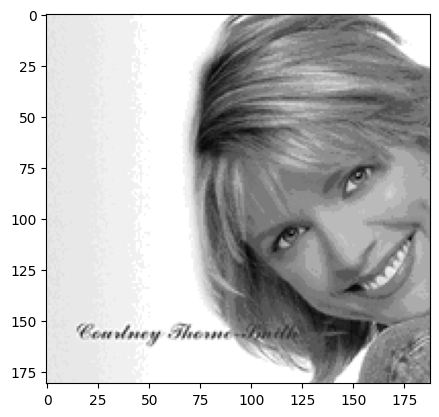

In [162]:
A1 = CalculateOperator(X, Y, PseudoInverseMatrix_MoorePenrose, eps=1e-60, delta=1000)
Y1 = ApplyOperator(X, A1)
ShowImage(Y1)

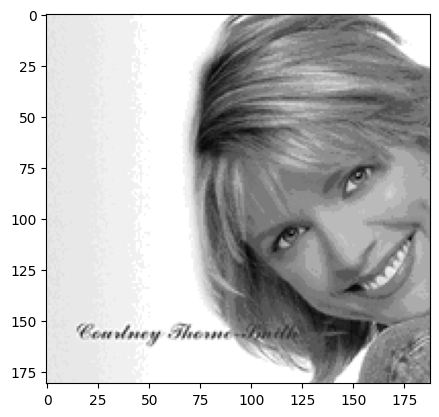

In [163]:
A2 = CalculateOperator(X, Y, PseudoInverseMatrix_Greville, eps=1e-60, delta=None)
Y2 = ApplyOperator(X, A2)
ShowImage(Y2)

In [164]:
def CalculateError1(Y, Y_expected):
    return np.linalg.norm(Y - Y_expected, ord=1)

def calculate_error(true_matrix, predicted_matrix):
    mse = np.mean((true_matrix - predicted_matrix)**2)
    rmse = np.sqrt(mse)
    return mse, rmse

print('Error 1 Moore-Penrose:', CalculateError1(Y, Y1))
print('Error 1 Greville:', CalculateError1(Y, Y2))

print('MSE, RMSE Moore-Penrose:', calculate_error(Y, Y1))
print('MSE, RMSE Greville:', calculate_error(Y, Y2))

Error 1 Moore-Penrose: 4.2518877307884395e-10
Error 1 Greville: 4.2518877307884395e-10
MSE, RMSE Moore-Penrose: (8.043827427055921e-25, 8.968738722393423e-13)
MSE, RMSE Greville: (8.043827427055921e-25, 8.968738722393423e-13)
